In [1]:
# Imports
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv
import yfinance as yf
import numpy as np
from itertools import product
from functools import reduce

# Sentiment Analysis Imports
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

# Natural Language Processing
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud

# Filter warnings for efficient script runtime
import warnings
warnings.filterwarnings('default') # 'ignore' to ignore warnings

# Display float datatypes with ,s
pd.options.display.float_format = '{:,.2f}'.format # Remove '.2f' for all decimals

# Set number of displayed rows in output
pd.set_option('display.max_rows', 10)
#pd.reset_option('display.max_rows')

# Load .env enviroment variables
load_dotenv()

%matplotlib inline

## Reinstall commands if having trouble with json, pyvizenv resintall guide
# pip install yfinance
# Git Bash and Jupyter Terminal: pip install numpy==1.19.4 --user

In [2]:
# Read CSV with asset info into lists and dictionary
stockcsv = pd.read_csv('DAC_Short_Watchlist_Data.csv')

stocks = stockcsv['Symbol'].to_list()

stockwatchlist = {
    'Asset' : stocks
}

# Creating a dataframe using the dictionary
watchlist = pd.DataFrame(stockwatchlist)
watchlist = watchlist.set_index('Asset')

watchlist#.head()

""
Asset
ABNB
AMD
AMZN
ARKK
CAT
...
XLRE
XLU
XLV


In [3]:
# Getting Sector info for Stocks
stocksectors = []
# Getting Industry info for Stocks
stockindustries = []
# Getting marketCap info for Stocks
marketCap = []
# Getting previousClose info for Stocks
previousClose = []
# Getting fiftyTwoWeekHigh info for Stocks
fiftyTwoWeekHigh = []
# Getting fiftyTwoWeekLow info for Stocks
fiftyTwoWeekLow = []
# Getting twoHundredDayAverage info for Stocks
twoHundredDayAverage = []
# Getting dividendYield info for Stocks
dividendYield = []
# Getting beta info for Stocks
beta = []
# Getting pegRatio info for Stocks
pegRatio = []
# Getting forwardPE info for Stocks
forwardPE = []
# Getting forwardEps info for Stocks
forwardEps = []
# Getting earningsGrowth info for Stocks
earningsGrowth = []
# Getting revenueGrowth info for Stocks
revenueGrowth = []
# Getting profitMargins info for Stocks
profitMargins = []
# Getting grossMargins info for Stocks
grossMargins = []
# Getting totalCash info for Stocks
totalCash = []
# Getting totalDebt info for Stocks
totalDebt = []
# Getting shortPercentOfFloat info for Stocks
shortPercentOfFloat = []
# Getting shortName info for Stocks
shortName = []

# For loop for pulling data for each ticker in list; 'quoteType' for word 'Equity' or 'ETF', 'openInterest' for 'None' which then gets filled to be 0
for i in stocks:
    tickers = yf.Tickers(i)
    info = (tickers.tickers[i]).info
    j = (tickers.tickers[i]).info['quoteType']
    k = (tickers.tickers[i]).info['openInterest']
    
    
    if 'sector' in info:
        stocksectors.append((tickers.tickers[i]).info['sector'])
        
    else:
        stocksectors.append(j)
        
    if 'industry' in info:
        stockindustries.append((tickers.tickers[i]).info['industry'])
        
    else:
        stockindustries.append(j)
        
    if 'marketCap' in info:
        marketCap.append((tickers.tickers[i]).info['marketCap'])
        
    else:
        marketCap.append(k)
        
    if 'previousClose' in info:
        previousClose.append((tickers.tickers[i]).info['previousClose'])
        
    else:
        previousClose.append(k)
        
    if 'twoHundredDayAverage' in info:
        twoHundredDayAverage.append((tickers.tickers[i]).info['twoHundredDayAverage'])
        
    else:
        twoHundredDayAverage.append(k)

    if 'fiftyTwoWeekHigh' in info:
        fiftyTwoWeekHigh.append((tickers.tickers[i]).info['fiftyTwoWeekHigh'])
        
    else:
        fiftyTwoWeekHigh.append(k)    

        
    if 'fiftyTwoWeekLow' in info:
        fiftyTwoWeekLow.append((tickers.tickers[i]).info['fiftyTwoWeekLow'])
        
    else:
        fiftyTwoWeekLow.append(k)

    if 'dividendYield' in info:
        dividendYield.append((tickers.tickers[i]).info['dividendYield'])
        
    else:
        dividendYield.append(k)
        
    if 'beta' in info:
        beta.append((tickers.tickers[i]).info['beta'])
        
    else:
        beta.append(k)
        
    if 'pegRatio' in info:
        pegRatio.append((tickers.tickers[i]).info['pegRatio'])
        
    else:
        pegRatio.append(k)
        
    if 'forwardPE' in info:
        forwardPE.append((tickers.tickers[i]).info['forwardPE'])
        
    else:
        forwardPE.append(k)
        
    if 'forwardEps' in info:
        forwardEps.append((tickers.tickers[i]).info['forwardEps'])
        
    else:
        forwardEps.append(k)
        
    if 'earningsGrowth' in info:
        earningsGrowth.append((tickers.tickers[i]).info['earningsGrowth'])
        
    else:
        earningsGrowth.append(k)
        
    if 'revenueGrowth' in info:
        revenueGrowth.append((tickers.tickers[i]).info['revenueGrowth'])
        
    else:
        revenueGrowth.append(k)
        
    if 'profitMargins' in info:
        profitMargins.append((tickers.tickers[i]).info['profitMargins'])
        
    else:
        profitMargins.append(k)
        
    if 'grossMargins' in info:
        grossMargins.append((tickers.tickers[i]).info['grossMargins'])
        
    else:
        grossMargins.append(k)
        
    if 'totalCash' in info:
        totalCash.append((tickers.tickers[i]).info['totalCash'])
        
    else:
        totalCash.append(k)
        
    if 'totalDebt' in info:
        totalDebt.append((tickers.tickers[i]).info['totalDebt'])
        
    else:
        totalDebt.append(k)
        
    if 'shortPercentOfFloat' in info:
        shortPercentOfFloat.append((tickers.tickers[i]).info['shortPercentOfFloat'])
        
    else:
        shortPercentOfFloat.append(k)

    if 'shortName' in info:
        shortName.append((tickers.tickers[i]).info['shortName'])
        
    else:
        shortName.append(j)
        
# Create stock shortName column
watchlist['Company Name'] = shortName
# Create stock Sector column
watchlist['Sector'] = stocksectors
# Create Industry column
watchlist['Industry'] = stockindustries
# Create Market Cap column
watchlist['Market Cap'] = marketCap
watchlist['Market Cap'] = watchlist['Market Cap'].fillna(0)
# Create Previous Close column
watchlist['Previous Close'] = previousClose
# Create 200 Day Average column
watchlist['200 Day Average'] = twoHundredDayAverage
watchlist['200 Day Average'] = watchlist['200 Day Average'].fillna(0)
# Create stock fiftyTwoWeekHigh column
watchlist['52 Wk High'] = fiftyTwoWeekHigh
watchlist['52 Wk High'] = watchlist['52 Wk High'].fillna(0)
# Create stock fiftyTwoWeekLow column
watchlist['52 Wk Low'] = fiftyTwoWeekLow
watchlist['52 Wk Low'] = watchlist['52 Wk Low'].fillna(0)
# Create stock dividendYield column
watchlist['Dividend %'] = dividendYield
watchlist['Dividend %'] = watchlist['Dividend %'].fillna(0)
watchlist['Dividend %'] = watchlist['Dividend %']*100
# Create Beta column
watchlist['Beta'] = beta
watchlist['Beta'] = watchlist['Beta'].fillna(0)
# Create PEG Ratio column
watchlist['PEG Ratio'] = pegRatio
watchlist['PEG Ratio'] = watchlist['PEG Ratio'].fillna(0)
# Create Forward PE column
watchlist['Forward PE'] = forwardPE
watchlist['Forward PE'] = watchlist['Forward PE'].fillna(0)
# Create Forward EPS column
watchlist['Forward EPS'] = forwardEps
watchlist['Forward EPS'] = watchlist['Forward EPS'].fillna(0)
# Create Earnings Growth column
watchlist['Earnings Growth %'] = earningsGrowth
watchlist['Earnings Growth %'] = watchlist['Earnings Growth %'].fillna(0)
watchlist['Earnings Growth %'] = watchlist['Earnings Growth %']*100
# Create Revenue Growth column
watchlist['Revenue Growth %'] = revenueGrowth
watchlist['Revenue Growth %'] = watchlist['Revenue Growth %'].fillna(0)
watchlist['Revenue Growth %'] = watchlist['Revenue Growth %']*100
# Create Revenue Growth column
watchlist['Profit Margins'] = profitMargins
watchlist['Profit Margins'] = watchlist['Profit Margins'].fillna(0)
# Create Gross Margins column
watchlist['Gross Margins'] = grossMargins
watchlist['Gross Margins'] = watchlist['Gross Margins'].fillna(0)
# Create Total Cash column
watchlist['Total Cash'] = totalCash
watchlist['Total Cash'] = watchlist['Total Cash'].fillna(0)
# Create Total Debt column
watchlist['Total Debt'] = totalDebt
watchlist['Total Debt'] = watchlist['Total Debt'].fillna(0)
# Create Short Percent column
watchlist['Short Percent'] = shortPercentOfFloat
watchlist['Short Percent'] = watchlist['Short Percent'].fillna(0)
watchlist['Short Percent'] = watchlist['Short Percent']*100

watchlist#.head()

,Company Name,Sector,Industry,Market Cap,Previous Close,200 Day Average,52 Wk High,52 Wk Low,Dividend %,Beta,PEG Ratio,Forward PE,Forward EPS,Earnings Growth %,Revenue Growth %,Profit Margins,Gross Margins,Total Cash,Total Debt,Short Percent
Asset,,,,,,,,,,,,,,,,,,,,
ABNB,"Airbnb, Inc.",Consumer Cyclical,Travel Services,"60,247,588,864.00",91.05,152.86,212.58,86.71,0.00,0.00,0.74,38.80,2.44,0.00,70.10,0.12,0.81,"9,322,289,152.00","2,406,010,112.00",5.16
AMD,"Advanced Micro Devices, Inc.",Technology,Semiconductors,"131,439,566,848.00",78.60,114.03,164.46,71.60,0.00,1.94,0.64,16.45,4.93,24.40,70.90,0.18,0.50,"6,531,999,744.00","2,156,999,936.00",2.02
AMZN,"Amazon.com, Inc.",Consumer Cyclical,Internet Retail,"1,155,303,211,008.00",110.63,148.99,188.11,101.26,0.00,1.25,3.90,43.01,2.64,0.00,7.30,0.04,0.42,"66,384,998,400.00","147,266,994,176.00",1.03
ARKK,ARK Innovation ETF,ETF,ETF,0.00,43.10,75.22,126.32,35.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
CAT,"Caterpillar, Inc.",Industrials,Farm & Heavy Construction Machinery,"92,476,391,424.00",169.94,205.61,237.90,167.08,2.76,0.99,0.91,12.02,14.43,3.20,14.30,0.12,0.25,"6,474,999,808.00","37,583,998,976.00",1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XLRE,Real Estate Select Sector SPDR,ETF,ETF,0.00,40.35,46.27,52.17,38.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
XLU,SPDR Select Sector Fund - Utili,ETF,ETF,0.00,69.63,69.64,77.23,63.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
XLV,SPDR Select Sector Fund - Healt,ETF,ETF,0.00,127.13,131.90,143.42,118.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [4]:
# Stock Data
stock_close = yf.download(stocks, group_by='Ticker', period='max')

# Create CSV of ticker data
stock_close.to_csv('stock_close_combined.csv')

stock_close = stock_close.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

stock_close = pd.read_csv('stocks.csv', header=[0, 1])
stock_close.drop([0], axis=0, inplace=True)  # drop this row because it only has one column with Date in it
stock_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')] = pd.to_datetime(stock_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')], format='%Y-%m-%d')  # convert the first column to a datetime
stock_close.set_index(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'), inplace=True)  # set the first column as the index
stock_close.index.name = None

# Drop Null Information
stock_close = stock_close.dropna()

# Sort Multi-Index To Match Weights
stock_close = stock_close.reindex(sorted(stock_close.columns), axis=1)

stock_close#.head()

[*********************100%***********************]  68 of 68 completed


ABNB                                                AMD        \
           Adj Close  Close   High    Low   Open       Volume Adj Close Close   
2021-04-14    176.43 176.43 181.47 175.31 179.50 2,938,600.00     78.55 78.55   
2021-04-15    175.35 175.35 178.24 174.25 177.00 2,894,900.00     83.01 83.01   
2021-04-16    178.69 178.69 179.51 172.94 176.01 3,058,300.00     82.15 82.15   
2021-04-19    174.58 174.58 178.72 171.50 177.32 3,125,700.00     81.11 81.11   
2021-04-20    169.57 169.57 175.00 165.52 173.18 4,575,000.00     79.27 79.27   
...              ...    ...    ...    ...    ...          ...       ...   ...   
2022-07-11     95.10  95.10  97.09  93.27  96.00 6,041,400.00     76.95 76.95   
2022-07-12     96.55  96.55  97.69  93.32  95.30 4,170,200.00     76.36 76.36   
2022-07-13     95.64  95.64  96.59  91.61  93.75 6,967,800.00     77.52 77.52   
2022-07-14     91.05  91.05  94.58  90.17  94.28 8,334,600.00     78.60 78.60   
2022-07-15     94.66  94.66  95.63  90.69  92.55 7,460,829.00     81.11 81.11   

                        ...    XLY                                  ZTS  \
            High   Low  ...   High    Low   Open       Volume Adj Close   
2021-04-14 80.13 77.94  ... 180.16 176.85 179.38 3,338,200.00    162.18   
2021-04-15 83.95 79.97  ... 178.60 177.49 178.46 2,515,600.00    164.53   
2021-04-16 83.59 81.53  ... 180.11 178.44 178.92 2,638,000.00    166.70   
2021-04-19 83.18 80.39  ... 179.05 177.29 178.88 3,515,400.00    167.17   
2021-04-20 81.11 78.51  ... 177.63 174.30 177.22 4,231,000.00    168.06   
...          ...   ...  ...    ...    ...    ...          ...       ...   
2022-07-11 78.29 75.84  ... 145.84 142.01 145.44 3,807,600.00    177.04   
2022-07-12 77.44 74.43  ... 144.59 140.59 142.36 7,437,200.00    173.81   
2022-07-13 79.11 74.48  ... 143.92 138.14 138.70 7,118,100.00    167.81   
2022-07-14 79.25 76.00  ... 142.78 139.37 141.09 5,257,600.00    170.79   
2022-07-15 81.20 77.90  ... 145.50 143.44 144.33 3,756,400.00    174.54   

                                                     
            Close   High    Low   Open       Volume  
2021-04-14 163.08 164.84 162.63 164.01 1,183,100.00  
2021-04-15 165.45 166.40 163.93 163.93 2,041,500.00  
2021-04-16 167.63 168.27 166.00 166.27 2,290,800.00  
2021-04-19 168.10 168.27 166.59 167.50 1,842,700.00  
2021-04-20 168.74 169.70 167.55 167.95 1,984,700.00  
...           ...    ...    ...    ...          ...  
2022-07-11 177.04 178.46 176.53 177.85 1,008,700.00  
2022-07-12 173.81 179.21 173.15 176.70 1,643,000.00  
2022-07-13 167.81 170.97 167.05 170.40 2,271,500.00  
2022-07-14 170.79 170.94 165.75 166.93 1,570,500.00  
2022-07-15 174.54 175.21 173.17 173.57 2,332,346.00  

[317 rows x 408 columns]

In [5]:
#### Average True Range (ATR) Function #### Stock data needs to be greater than 28 days for ATR calculation 
#### IF NAN TRY 14 OR 10 DAY MEAN
def Average_True_Range(stock_close,Ticker):
    high_low = stock_close[Ticker]['High'] - stock_close[Ticker]['Low']
    high_cp = np.abs(stock_close[Ticker]['High'] - stock_close[Ticker]['Close'].shift())
    low_cp = np.abs(stock_close[Ticker]['Low'] - stock_close[Ticker]['Close'].shift())
    df = pd.concat([high_low, high_cp, low_cp], axis = 1)
    tr = np.max(df, axis = 1)
    average_true_range = tr.rolling(10).mean()
    return average_true_range[-1]

stocksatr = []
for i in stocks:
     stocksatr.append(Average_True_Range(stock_close, i))
        
# Close Price Function
def Close_Price(stock_close,Ticker):
    close_price = stock_close[Ticker]['Close']
    return close_price[-1]

stockclose = []
for i in stocks:
    stockclose.append(Close_Price(stock_close, i))

stocksatr

[5.175799560546878,
 3.5529991149902345,
 4.541000366210936,
 2.788809585571291,
 5.986001586914066,
 0.6428902626037601,
 1.0280000686645518,
 3.37650146484375,
 45.12850341796875,
 5.679500198364258,
 12.378994750976574,
 4.594001770019543,
 9.268997192382812,
 2.6870002746581974,
 0.8009996414184574,
 1.0130001068115235,
 15.535002136230464,
 5.9023994445800785,
 0.9867001533508306,
 1.551500320434568,
 0.926999950408935,
 0.7019999504089356,
 76.1998779296875,
 6.9502227783202954,
 4.0680999755859375,
 3.4959999084472613,
 2.894001770019531,
 2.0475006103515625,
 1.73360004425049,
 11.05800170898437,
 6.856990051269506,
 20.08850097656248,
 0.8559998512268067,
 8.460000610351566,
 4.496998596191409,
 7.0929992675781275,
 1.203000259399417,
 2.9780014038086025,
 1.5659997940063488,
 3.2184898376464828,
 6.970004272460926,
 3.483510589599608,
 2.1830005645751966,
 0.6621000289916994,
 2.357997894287114,
 2.0490013122558595,
 18.080796813964874,
 5.0965988159179645,
 6.976004028320313

In [6]:
## Final data preparation and cleaning prior to export for visualization creation
# Stocks Portifolio ATR values
watchlist['ATR'] = stocksatr

# Stocks Portifolio ATR Percentage
watchlist['ATR %'] = 100 * watchlist['ATR'] / watchlist['Previous Close']

# Stocks Percentage From 52 Week High
watchlist['% From 52 Week High'] = 100 * (watchlist['Previous Close'] - watchlist['52 Wk High']) / watchlist['52 Wk High']

# Stocks Percentage From 52 Week Low
watchlist['% From 52 Week Low'] = 100 * (watchlist['Previous Close'] - watchlist['52 Wk Low']) / watchlist['52 Wk Low']

# Create CSV of watchlist data
watchlist.to_csv('yf_watchlist_data.csv')

watchlist

,Company Name,Sector,Industry,Market Cap,Previous Close,200 Day Average,52 Wk High,52 Wk Low,Dividend %,Beta,...,Revenue Growth %,Profit Margins,Gross Margins,Total Cash,Total Debt,Short Percent,ATR,ATR %,% From 52 Week High,% From 52 Week Low
Asset,,,,,,,,,,,,,,,,,,,,,
ABNB,"Airbnb, Inc.",Consumer Cyclical,Travel Services,"60,247,588,864.00",91.05,152.86,212.58,86.71,0.00,0.00,...,70.10,0.12,0.81,"9,322,289,152.00","2,406,010,112.00",5.16,5.18,5.68,-57.17,5.01
AMD,"Advanced Micro Devices, Inc.",Technology,Semiconductors,"131,439,566,848.00",78.60,114.03,164.46,71.60,0.00,1.94,...,70.90,0.18,0.50,"6,531,999,744.00","2,156,999,936.00",2.02,3.55,4.52,-52.21,9.78
AMZN,"Amazon.com, Inc.",Consumer Cyclical,Internet Retail,"1,155,303,211,008.00",110.63,148.99,188.11,101.26,0.00,1.25,...,7.30,0.04,0.42,"66,384,998,400.00","147,266,994,176.00",1.03,4.54,4.10,-41.19,9.25
ARKK,ARK Innovation ETF,ETF,ETF,0.00,43.10,75.22,126.32,35.10,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2.79,6.47,-65.88,22.79
CAT,"Caterpillar, Inc.",Industrials,Farm & Heavy Construction Machinery,"92,476,391,424.00",169.94,205.61,237.90,167.08,2.76,0.99,...,14.30,0.12,0.25,"6,474,999,808.00","37,583,998,976.00",1.09,5.99,3.52,-28.57,1.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XLRE,Real Estate Select Sector SPDR,ETF,ETF,0.00,40.35,46.27,52.17,38.63,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.77,1.90,-22.66,4.45
XLU,SPDR Select Sector Fund - Utili,ETF,ETF,0.00,69.63,69.64,77.23,63.37,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.43,2.05,-9.84,9.88
XLV,SPDR Select Sector Fund - Healt,ETF,ETF,0.00,127.13,131.90,143.42,118.75,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2.22,1.75,-11.36,7.06


In [7]:
## Final preparation and cleaning of price data for visualization creation
# Download each ticker data individually
for ticker in stocks:
    data = yf.download(ticker, group_by="Ticker", period='max')
    data.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'], inplace = True)
    data.columns = [ticker]
    data.to_csv(f'ticker_{ticker}.csv')  # ticker_AAPL.csv for example

# Set the destination path for price data files
p = Path('c:/Users/jorda/Desktop/Google Data Analytics/Capstone_Project')

# Find the files
files = list(p.glob('ticker_*.csv'))

# Read the files into a dataframe
df_list = list()
for file in files:
    df_list.append(pd.read_csv(file))

# Combine dataframes
stockclosedata = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), df_list)#.fillna('void')
stockclosedata.reset_index(drop=True, inplace=True)
stockclosedata.set_index('Date', inplace=True)

# Create CSV of stock closing price data
stockclosedata.to_csv('stock_close_data.csv')

stockclosedata.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,ABNB,AMD,AMZN,ARKK,CAT,CCL,CHGG,CLX,CMG,COIN,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-10,144.71,91.66,155.07,125.20,178.85,22.32,80.57,200.60,"1,317.23",nan,...,41.60,28.75,88.56,124.56,67.17,36.25,62.14,112.12,157.05,158.12
2020-12-11,139.25,91.65,155.82,123.87,179.29,21.32,81.95,201.73,"1,300.00",nan,...,41.12,28.46,88.77,124.30,67.32,36.27,62.24,111.68,156.30,159.53
2020-12-14,130.00,94.78,157.85,124.25,178.05,20.93,83.46,202.38,"1,309.52",nan,...,39.68,28.13,87.62,124.75,67.06,36.01,61.92,110.84,156.53,159.50
2020-12-15,124.80,97.12,158.26,124.30,181.74,21.53,85.66,203.04,"1,346.46",nan,...,40.46,28.61,88.84,126.83,67.22,36.64,63.14,112.04,158.64,161.96
2020-12-16,137.99,96.85,162.05,123.95,179.50,21.76,87.02,203.44,"1,400.62",nan,...,40.26,28.66,88.29,127.69,67.35,36.65,62.41,111.71,159.68,160.62


## Sentiment Score

In [8]:
# NewsAPI Key
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

# Fetch the S&P 500 news articles
sp_headlines = newsapi.get_everything(
    q="S&P 500 OR SPY",
    language="en",
    sort_by="relevancy",
    #sources="business-insider, techcrunch, reuters",
    domains="cnbc.com, bloomberg.com"
)

sp_headlines["totalResults"]

320

In [9]:
# Fetch the NASDAQ news articles
qqq_headlines = newsapi.get_everything(
    q="Nasdaq 100 OR QQQ",
    language="en",
    sort_by="relevancy",
    #sources="business-insider, techcrunch, reuters",
    domains="cnbc.com, bloomberg.com"
)

qqq_headlines["totalResults"]

145

In [10]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy",
    #sources="business-insider, techcrunch, reuters",
    domains="cnbc.com, yahoo.com, coindesk.com"
)

btc_headlines["totalResults"]

1128

In [11]:
# Fetch the ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy",
    #sources="business-insider, techcrunch, reuters",
    domains="cnbc.com, yahoo.com, coindesk.com"
)

eth_headlines["totalResults"]

456

In [12]:
# Create the Bitcoin sentiment scores DataFrame
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]
            url = article["url"]
            source = article["source"]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language,
                "url": url,
                "source": source
                
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

# Create the S&P 500 sentiment scores DataFrame
sp_news = create_df(sp_headlines["articles"], "en")
sp_news.head()

,date,description,language,source,text,title,url
0,2022-07-14,,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}","Jennifer Rumsey, the chief operating officer o...","Cummins Makes Rumsey CEO, Adding to Female Lea...",https://www.bloomberg.com/news/articles/2022-0...
1,2022-06-18,"In early January, the outlook for the next 12 ...",en,"{'id': 'bloomberg', 'name': 'Bloomberg'}","In early January, the outlook for the next 12 ...",'How's That for a Lesson?': Wall Street Review...,https://www.bloomberg.com/news/articles/2022-0...
2,2022-07-01,Understand every aspect of the global economy ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}","In today's Dubai Daybreak podcast, we cover th...",Daybreak: Stocks Make Tentative Start to Secon...,https://www.bloomberg.com/news/audio/2022-07-0...
3,2022-06-16,Understand every aspect of the global economy ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}","Source: Bloomberg, 02:48\r\nToday's Sydney Day...",Daybreak: Stock Selloff Continues; BOJ May Sta...,https://www.bloomberg.com/news/audio/2022-06-1...
4,2022-06-28,In a year that has seen widespread selling of ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",In a year that has seen widespread selling of ...,The Number of Netflix Bulls Is Dwindling,https://www.bloomberg.com/news/articles/2022-0...


In [13]:
# Create the Nasdaq 100 sentiment scores DataFrame
qqq_news = create_df(qqq_headlines["articles"], "en")
qqq_news.head()

,date,description,language,source,text,title,url
0,2022-06-16,Understand every aspect of the global economy ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",Bloomberg's Emily Chang breaks down the latest...,Nasdaq Drops 4% and Twitter's All-Hands Meetin...,https://www.bloomberg.com/news/audio/2022-06-1...
1,2022-07-14,The worst rout in more than a decade for the U...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",The worst rout in more than a decade for the U...,US Tech Stocks Are Luring Indian Retail Invest...,https://www.bloomberg.com/news/articles/2022-0...
2,2022-06-28,In a year that has seen widespread selling of ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",In a year that has seen widespread selling of ...,The Number of Netflix Bulls Is Dwindling,https://www.bloomberg.com/news/articles/2022-0...
3,2022-07-05,"""Tech's become absolutely hated, maybe so hate...",en,"{'id': None, 'name': 'CNBC'}",CNBC's Jim Cramer on Tuesday told investors hi...,Jim Cramer says investors should eye these thr...,https://www.cnbc.com/2022/07/05/jim-cramer-say...
4,2022-06-30,Skeptics have long made a sport of predicting ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",Skeptics have long made a sport of predicting ...,Tech-Heavy Nasdaq 100 (NDX) Heads for Historic...,https://www.bloomberg.com/news/articles/2022-0...


In [14]:
# Create the Bitcoin sentiment scores DataFrame
btc_news = create_df(btc_headlines["articles"], "en")
btc_news.head()

,date,description,language,source,text,title,url
0,2022-06-29,"Sebastien Vachon-Desjardins, who worked with t...",en,"{'id': None, 'name': 'Yahoo Entertainment'}","Sebastien Vachon-Desjardins, 34, was a prolifi...",Canadian admits to hacking spree with Russian ...,https://finance.yahoo.com/news/canadian-admits...
1,2022-06-16,The cryptocurrency crash is hurting many inves...,en,"{'id': None, 'name': 'Yahoo Entertainment'}",Many shops make clear to customers that they a...,El Salvador: The country where you can buy any...,https://finance.yahoo.com/news/el-salvador-cou...
2,2022-07-11,Gryphon received a loan in bitcoin that will a...,en,"{'id': None, 'name': 'CoinDesk'}","Please note that ourprivacy policy,terms of us...",Gryphon Mining 'Able to Take Advantage of Oppo...,https://www.coindesk.com/business/2022/07/11/g...
3,2022-07-06,"The company continued to sell its bitcoin, alo...",en,"{'id': None, 'name': 'CoinDesk'}","Riot Blockchain, one of the largest bitcoin mi...",Riot Blockchain Starts Move Away From New York...,https://www.coindesk.com/business/2022/07/06/r...
4,2022-06-21,The Canadian Purpose Bitcoin ETF lost half of ...,en,"{'id': None, 'name': 'CoinDesk'}",The world's largest bitcoin (BTC) spot exchang...,'Enormous Outflows' From Largest Bitcoin ETF M...,https://www.coindesk.com/markets/2022/06/21/en...


In [15]:
# Create the Ethereum sentiment scores DataFrame
eth_news = create_df(eth_headlines["articles"], "en")
eth_news.head()

,date,description,language,source,text,title,url
0,2022-06-16,Many market participants think the highly anti...,en,"{'id': None, 'name': 'CoinDesk'}",I don't usually make short-term prognosticatio...,Sell the Ethereum Merge,https://www.coindesk.com/tech/2022/06/16/sell-...
1,2022-07-05,"Despite the Merge edging closer, Bitmain is re...",en,"{'id': None, 'name': 'CoinDesk'}","Please note that ourprivacy policy,terms of us...",Bitmain to Start Selling New Ethereum Mining R...,https://www.coindesk.com/tech/2022/07/05/bitma...
2,2022-07-06,Proposer-builder separation is one way Ethereu...,en,"{'id': None, 'name': 'CoinDesk'}",Post-Merge Ethereum will trigger a paradigm sh...,Are Block Builders the Key to Solving Ethereum...,https://www.coindesk.com/layer2/2022/07/06/are...
3,2022-06-29,"By ditching Ethereum for Cosmos, dYdX has spar...",en,"{'id': None, 'name': 'CoinDesk'}","Last week, crypto derivatives exchange dYdX an...",A Major Crypto Exchange Abandons Ethereum: Is ...,https://www.coindesk.com/layer2/2022/06/29/a-m...
4,2022-07-13,The skateboarder's foray into the metaverse wi...,en,"{'id': None, 'name': 'CoinDesk'}","Please note that ourprivacy policy,terms of us...",Tony Hawk Skates Into the Metaverse With ‘Larg...,https://www.coindesk.com/business/2022/07/13/t...


In [16]:
# Create the Bitcoin sentiment scores DataFrame
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0
    if score >= 0.05:
        result = 1
    elif score <= -0.05:
        result = -1
    return result

# Sentiment scores dictionaries
def sent_score(df):
    title_sent = {
        "title_compound": [],
        "title_pos": [],
        "title_neu": [],
        "title_neg": [],
        "title_sent": [],
    }
    text_sent = {
        "text_compound": [],
        "text_pos": [],
        "text_neu": [],
        "text_neg": [],
        "text_sent": [],
    }

# Get sentiment for the text and the title
    for index, row in df.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_sent["title_compound"].append(title_sentiment["compound"])
            title_sent["title_pos"].append(title_sentiment["pos"])
            title_sent["title_neu"].append(title_sentiment["neu"])
            title_sent["title_neg"].append(title_sentiment["neg"])
            title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))
            text_sentiment = analyzer.polarity_scores(row["text"])
            text_sent["text_compound"].append(text_sentiment["compound"])
            text_sent["text_pos"].append(text_sentiment["pos"])
            text_sent["text_neu"].append(text_sentiment["neu"])
            text_sent["text_neg"].append(text_sentiment["neg"])
            text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
        except AttributeError:
            pass
    title_sentiment_df = pd.DataFrame(title_sent)
    text_sentiment_df = pd.DataFrame(text_sent)
    df = df.join(title_sentiment_df).join(text_sentiment_df)
    return df

In [17]:
sp_news_sent = sent_score(sp_news)
sp_news_sent.head()

,date,description,language,source,text,title,url,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-07-14,,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}","Jennifer Rumsey, the chief operating officer o...","Cummins Makes Rumsey CEO, Adding to Female Lea...",https://www.bloomberg.com/news/articles/2022-0...,0.00,0.00,1.00,0.00,0,0.42,0.09,0.92,0.00,1
1,2022-06-18,"In early January, the outlook for the next 12 ...",en,"{'id': 'bloomberg', 'name': 'Bloomberg'}","In early January, the outlook for the next 12 ...",'How's That for a Lesson?': Wall Street Review...,https://www.bloomberg.com/news/articles/2022-0...,0.00,0.00,1.00,0.00,0,0.28,0.08,0.92,0.00,1
2,2022-07-01,Understand every aspect of the global economy ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}","In today's Dubai Daybreak podcast, we cover th...",Daybreak: Stocks Make Tentative Start to Secon...,https://www.bloomberg.com/news/audio/2022-07-0...,0.00,0.00,1.00,0.00,0,-0.78,0.05,0.76,0.19,-1
3,2022-06-16,Understand every aspect of the global economy ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}","Source: Bloomberg, 02:48\r\nToday's Sydney Day...",Daybreak: Stock Selloff Continues; BOJ May Sta...,https://www.bloomberg.com/news/audio/2022-06-1...,0.00,0.00,1.00,0.00,0,-0.68,0.00,0.83,0.17,-1
4,2022-06-28,In a year that has seen widespread selling of ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",In a year that has seen widespread selling of ...,The Number of Netflix Bulls Is Dwindling,https://www.bloomberg.com/news/articles/2022-0...,0.08,0.18,0.82,0.00,1,-0.60,0.00,0.86,0.14,-1


In [18]:
qqq_news_sent = sent_score(qqq_news)
qqq_news_sent.head()

,date,description,language,source,text,title,url,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-06-16,Understand every aspect of the global economy ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",Bloomberg's Emily Chang breaks down the latest...,Nasdaq Drops 4% and Twitter's All-Hands Meetin...,https://www.bloomberg.com/news/audio/2022-06-1...,0.00,0.00,1.00,0.00,0,-0.68,0.00,0.86,0.14,-1
1,2022-07-14,The worst rout in more than a decade for the U...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",The worst rout in more than a decade for the U...,US Tech Stocks Are Luring Indian Retail Invest...,https://www.bloomberg.com/news/articles/2022-0...,0.00,0.00,1.00,0.00,0,0.05,0.14,0.76,0.10,1
2,2022-06-28,In a year that has seen widespread selling of ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",In a year that has seen widespread selling of ...,The Number of Netflix Bulls Is Dwindling,https://www.bloomberg.com/news/articles/2022-0...,0.08,0.18,0.82,0.00,1,-0.60,0.00,0.86,0.14,-1
3,2022-07-05,"""Tech's become absolutely hated, maybe so hate...",en,"{'id': None, 'name': 'CNBC'}",CNBC's Jim Cramer on Tuesday told investors hi...,Jim Cramer says investors should eye these thr...,https://www.cnbc.com/2022/07/05/jim-cramer-say...,0.00,0.00,1.00,0.00,0,-0.57,0.09,0.74,0.17,-1
4,2022-06-30,Skeptics have long made a sport of predicting ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",Skeptics have long made a sport of predicting ...,Tech-Heavy Nasdaq 100 (NDX) Heads for Historic...,https://www.bloomberg.com/news/articles/2022-0...,0.00,0.00,1.00,0.00,0,0.27,0.06,0.90,0.04,1


In [19]:
btc_news_sent = sent_score(btc_news)
btc_news_sent.head()

,date,description,language,source,text,title,url,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-06-29,"Sebastien Vachon-Desjardins, who worked with t...",en,"{'id': None, 'name': 'Yahoo Entertainment'}","Sebastien Vachon-Desjardins, 34, was a prolifi...",Canadian admits to hacking spree with Russian ...,https://finance.yahoo.com/news/canadian-admits...,0.30,0.24,0.76,0.00,1,0.10,0.05,0.95,0.00,1
1,2022-06-16,The cryptocurrency crash is hurting many inves...,en,"{'id': None, 'name': 'Yahoo Entertainment'}",Many shops make clear to customers that they a...,El Salvador: The country where you can buy any...,https://finance.yahoo.com/news/el-salvador-cou...,0.00,0.00,1.00,0.00,0,0.75,0.24,0.69,0.07,1
2,2022-07-11,Gryphon received a loan in bitcoin that will a...,en,"{'id': None, 'name': 'CoinDesk'}","Please note that ourprivacy policy,terms of us...",Gryphon Mining 'Able to Take Advantage of Oppo...,https://www.coindesk.com/business/2022/07/11/g...,0.56,0.36,0.64,0.00,1,0.46,0.12,0.88,0.00,1
3,2022-07-06,"The company continued to sell its bitcoin, alo...",en,"{'id': None, 'name': 'CoinDesk'}","Riot Blockchain, one of the largest bitcoin mi...",Riot Blockchain Starts Move Away From New York...,https://www.coindesk.com/business/2022/07/06/r...,-0.56,0.00,0.71,0.29,-1,-0.85,0.00,0.80,0.20,-1
4,2022-06-21,The Canadian Purpose Bitcoin ETF lost half of ...,en,"{'id': None, 'name': 'CoinDesk'}",The world's largest bitcoin (BTC) spot exchang...,'Enormous Outflows' From Largest Bitcoin ETF M...,https://www.coindesk.com/markets/2022/06/21/en...,-0.40,0.00,0.79,0.21,-1,-0.51,0.05,0.81,0.14,-1


In [20]:
eth_news_sent = sent_score(eth_news)
eth_news_sent.head()

,date,description,language,source,text,title,url,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,2022-06-16,Many market participants think the highly anti...,en,"{'id': None, 'name': 'CoinDesk'}",I don't usually make short-term prognosticatio...,Sell the Ethereum Merge,https://www.coindesk.com/tech/2022/06/16/sell-...,0.00,0.00,1.00,0.00,0,0.42,0.12,0.88,0.00,1
1,2022-07-05,"Despite the Merge edging closer, Bitmain is re...",en,"{'id': None, 'name': 'CoinDesk'}","Please note that ourprivacy policy,terms of us...",Bitmain to Start Selling New Ethereum Mining R...,https://www.coindesk.com/tech/2022/07/05/bitma...,-0.13,0.00,0.86,0.14,-1,0.46,0.12,0.88,0.00,1
2,2022-07-06,Proposer-builder separation is one way Ethereu...,en,"{'id': None, 'name': 'CoinDesk'}",Post-Merge Ethereum will trigger a paradigm sh...,Are Block Builders the Key to Solving Ethereum...,https://www.coindesk.com/layer2/2022/07/06/are...,-0.53,0.15,0.49,0.36,-1,0.00,0.00,1.00,0.00,0
3,2022-06-29,"By ditching Ethereum for Cosmos, dYdX has spar...",en,"{'id': None, 'name': 'CoinDesk'}","Last week, crypto derivatives exchange dYdX an...",A Major Crypto Exchange Abandons Ethereum: Is ...,https://www.coindesk.com/layer2/2022/06/29/a-m...,-0.44,0.00,0.70,0.30,-1,0.00,0.00,1.00,0.00,0
4,2022-07-13,The skateboarder's foray into the metaverse wi...,en,"{'id': None, 'name': 'CoinDesk'}","Please note that ourprivacy policy,terms of us...",Tony Hawk Skates Into the Metaverse With ‘Larg...,https://www.coindesk.com/business/2022/07/13/t...,0.00,0.00,1.00,0.00,0,0.46,0.12,0.88,0.00,1


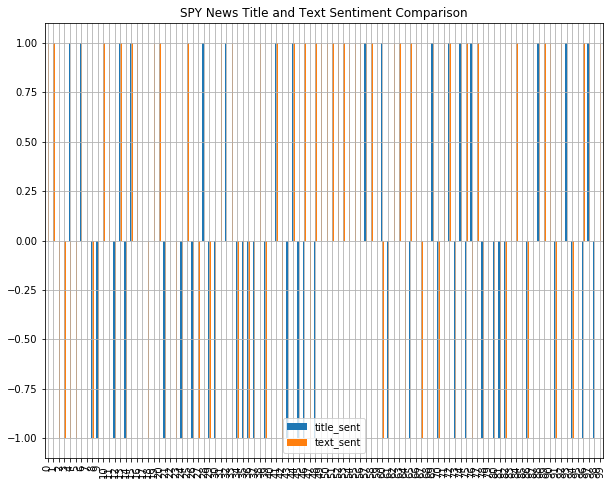

In [21]:
# Plot bar chart
sp_news_sent.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="SPY News Title and Text Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)

# ADD CODE TO EXPORT PLOT AS AN IMPORTABLE FILE IN TABLEAU

In [22]:
# Describe dataframe
sp_news_sent.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,-0.06,0.05,0.88,0.07,-0.15,-0.01,0.07,0.86,0.07,0.10
std,0.32,0.11,0.14,0.11,0.69,0.46,0.07,0.09,0.06,0.92
min,-0.81,0.00,0.54,0.00,-1.00,-0.84,0.00,0.65,0.00,-1.00
25%,-0.30,0.00,0.78,0.00,-1.00,-0.39,0.00,0.80,0.00,-1.00
50%,0.00,0.00,1.00,0.00,0.00,0.00,0.06,0.88,0.06,0.00
75%,0.00,0.00,1.00,0.17,0.00,0.32,0.10,0.93,0.10,1.00
max,0.67,0.46,1.00,0.46,1.00,0.93,0.35,1.00,0.26,1.00


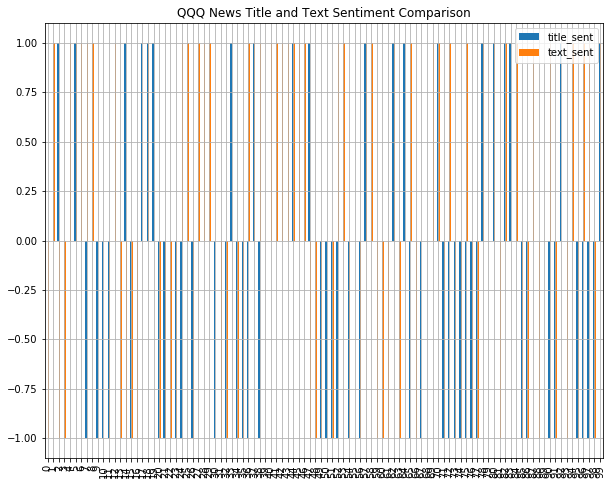

In [23]:
# Plot bar chart
qqq_news_sent.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="QQQ News Title and Text Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)

# ADD CODE TO EXPORT PLOT AS AN IMPORTABLE FILE IN TABLEAU

In [24]:
# Describe dataframe
qqq_news_sent.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,-0.09,0.05,0.86,0.09,-0.19,-0.02,0.06,0.88,0.06,0.02
std,0.31,0.09,0.14,0.12,0.75,0.45,0.06,0.08,0.06,0.92
min,-0.78,0.00,0.47,0.00,-1.00,-0.84,0.00,0.68,0.00,-1.00
25%,-0.30,0.00,0.77,0.00,-1.00,-0.41,0.00,0.83,0.00,-1.00
50%,0.00,0.00,0.84,0.00,0.00,0.00,0.06,0.89,0.06,0.00
75%,0.00,0.10,1.00,0.18,0.00,0.32,0.09,0.93,0.10,1.00
max,0.65,0.36,1.00,0.49,1.00,0.92,0.32,1.00,0.26,1.00


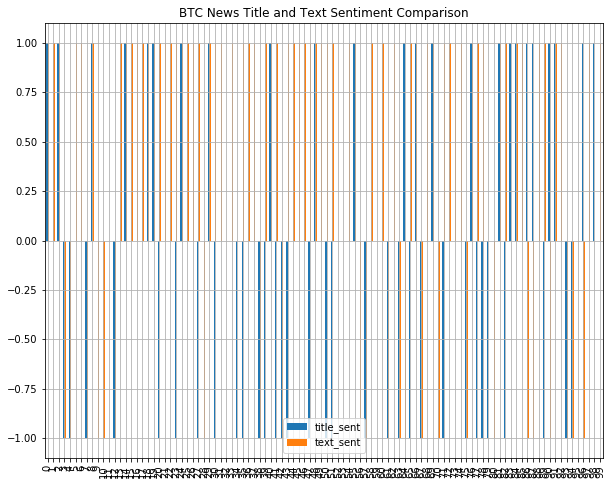

In [25]:
# Plot bar chart
btc_news_sent.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="BTC News Title and Text Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)

# ADD CODE TO EXPORT PLOT AS AN IMPORTABLE FILE IN TABLEAU

In [26]:
# Describe dataframe
btc_news_sent.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,-0.08,0.06,0.84,0.10,-0.08,0.27,0.11,0.85,0.04,0.42
std,0.34,0.11,0.16,0.15,0.75,0.46,0.07,0.08,0.06,0.85
min,-0.80,0.00,0.35,0.00,-1.00,-0.88,0.00,0.67,0.00,-1.00
25%,-0.36,0.00,0.72,0.00,-1.00,0.00,0.06,0.81,0.00,0.00
50%,0.00,0.00,0.83,0.00,0.00,0.46,0.12,0.85,0.00,1.00
75%,0.00,0.13,1.00,0.20,0.00,0.71,0.15,0.88,0.07,1.00
max,0.56,0.36,1.00,0.58,1.00,0.91,0.33,1.00,0.26,1.00


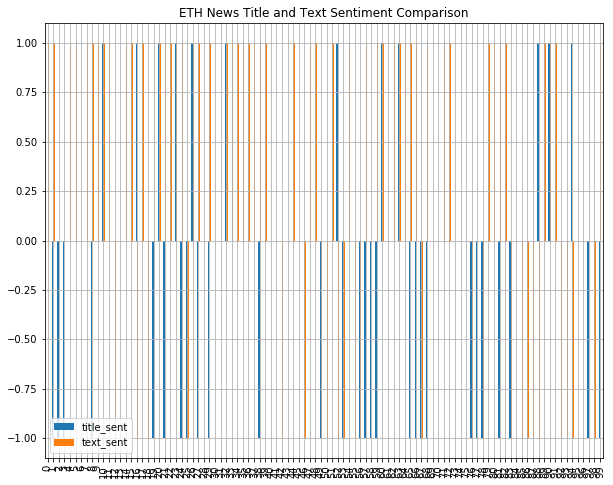

In [27]:
# Plot bar chart
eth_news_sent.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="ETH News Title and Text Sentiment Comparison",
    figsize=(10, 8),
    grid=True,
)

# ADD CODE TO EXPORT PLOT AS AN IMPORTABLE FILE IN TABLEAU

In [28]:
# Describe dataframe
eth_news_sent.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,-0.04,0.04,0.89,0.07,-0.16,0.20,0.09,0.87,0.03,0.28
std,0.23,0.10,0.16,0.12,0.61,0.46,0.08,0.09,0.06,0.83
min,-0.71,0.00,0.47,0.00,-1.00,-0.85,0.00,0.62,0.00,-1.00
25%,-0.10,0.00,0.82,0.00,-1.00,0.00,0.00,0.80,0.00,0.00
50%,0.00,0.00,1.00,0.00,0.00,0.15,0.08,0.88,0.00,1.00
75%,0.00,0.00,1.00,0.14,0.00,0.63,0.15,0.94,0.07,1.00
max,0.49,0.46,1.00,0.42,1.00,0.86,0.31,1.00,0.26,1.00


In [29]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('chars')
stop.append('char')
stop.append("''")
stop.append("'")
stop.append("’")
stop.append("S")
stop.append("&")
stop.append("P")
stop.append("500")
stop.append("amp")
stop.append("term")
stop.append("note")
stop.append("Please")
stop.append("m")
stop.append("Bloomberg")
stop.append("CNBC")
stop = set(stop) ### Update list when redundant words appear in wordcloud

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

# Create a new tokens column for S&P 500
sp_news_sent["tokens"] = sp_news_sent.text.apply(tokenizer)

# Create CSV of news sentiment data
sp_news_sent.to_csv('sp_news_sent.csv')

sp_news_sent.head()

<>:13: DeprecationWarning: invalid escape sequence \`
<>:13: DeprecationWarning: invalid escape sequence \`
<>:13: DeprecationWarning: invalid escape sequence \`
C:\Users\jorda\AppData\Local\Temp\ipykernel_19684\418573583.py:13: DeprecationWarning: invalid escape sequence \`
  stop.append("\`")


,date,description,language,source,text,title,url,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,2022-07-14,,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}","Jennifer Rumsey, the chief operating officer o...","Cummins Makes Rumsey CEO, Adding to Female Lea...",https://www.bloomberg.com/news/articles/2022-0...,0.00,0.00,1.00,0.00,0,0.42,0.09,0.92,0.00,1,"[Jennifer, Rumsey, chief, operating, officer, ..."
1,2022-06-18,"In early January, the outlook for the next 12 ...",en,"{'id': 'bloomberg', 'name': 'Bloomberg'}","In early January, the outlook for the next 12 ...",'How's That for a Lesson?': Wall Street Review...,https://www.bloomberg.com/news/articles/2022-0...,0.00,0.00,1.00,0.00,0,0.28,0.08,0.92,0.00,1,"[early, January, outlook, next, 12, month, loo..."
2,2022-07-01,Understand every aspect of the global economy ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}","In today's Dubai Daybreak podcast, we cover th...",Daybreak: Stocks Make Tentative Start to Secon...,https://www.bloomberg.com/news/audio/2022-07-0...,0.00,0.00,1.00,0.00,0,-0.78,0.05,0.76,0.19,-1,"[today, Dubai, Daybreak, podcast, cover, bigge..."
3,2022-06-16,Understand every aspect of the global economy ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}","Source: Bloomberg, 02:48\r\nToday's Sydney Day...",Daybreak: Stock Selloff Continues; BOJ May Sta...,https://www.bloomberg.com/news/audio/2022-06-1...,0.00,0.00,1.00,0.00,0,-0.68,0.00,0.83,0.17,-1,"[Source, Bloomberg, 02:48, Today, Sydney, Dayb..."
4,2022-06-28,In a year that has seen widespread selling of ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",In a year that has seen widespread selling of ...,The Number of Netflix Bulls Is Dwindling,https://www.bloomberg.com/news/articles/2022-0...,0.08,0.18,0.82,0.00,1,-0.60,0.00,0.86,0.14,-1,"[year, seen, widespread, selling, technology, ..."


In [30]:
# Create a new tokens column for Nasdaq 100
qqq_news_sent["tokens"] = qqq_news_sent.text.apply(tokenizer)

# Create CSV of news sentiment data
qqq_news_sent.to_csv('qqq_news_sent.csv')

qqq_news_sent.head()

,date,description,language,source,text,title,url,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,2022-06-16,Understand every aspect of the global economy ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",Bloomberg's Emily Chang breaks down the latest...,Nasdaq Drops 4% and Twitter's All-Hands Meetin...,https://www.bloomberg.com/news/audio/2022-06-1...,0.00,0.00,1.00,0.00,0,-0.68,0.00,0.86,0.14,-1,"[Bloomberg, Emily, Chang, break, latest, marke..."
1,2022-07-14,The worst rout in more than a decade for the U...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",The worst rout in more than a decade for the U...,US Tech Stocks Are Luring Indian Retail Invest...,https://www.bloomberg.com/news/articles/2022-0...,0.00,0.00,1.00,0.00,0,0.05,0.14,0.76,0.10,1,"[worst, rout, decade, US, tech-focused, Nasdaq..."
2,2022-06-28,In a year that has seen widespread selling of ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",In a year that has seen widespread selling of ...,The Number of Netflix Bulls Is Dwindling,https://www.bloomberg.com/news/articles/2022-0...,0.08,0.18,0.82,0.00,1,-0.60,0.00,0.86,0.14,-1,"[year, seen, widespread, selling, technology, ..."
3,2022-07-05,"""Tech's become absolutely hated, maybe so hate...",en,"{'id': None, 'name': 'CNBC'}",CNBC's Jim Cramer on Tuesday told investors hi...,Jim Cramer says investors should eye these thr...,https://www.cnbc.com/2022/07/05/jim-cramer-say...,0.00,0.00,1.00,0.00,0,-0.57,0.09,0.74,0.17,-1,"[CNBC, Jim, Cramer, Tuesday, told, investor, t..."
4,2022-06-30,Skeptics have long made a sport of predicting ...,en,"{'id': 'bloomberg', 'name': 'Bloomberg'}",Skeptics have long made a sport of predicting ...,Tech-Heavy Nasdaq 100 (NDX) Heads for Historic...,https://www.bloomberg.com/news/articles/2022-0...,0.00,0.00,1.00,0.00,0,0.27,0.06,0.90,0.04,1,"[Skeptics, long, made, sport, predicting, deca..."


In [31]:
# Create a new tokens column for Bitcoin
btc_news_sent["tokens"] = btc_news_sent.text.apply(tokenizer)

# Create CSV of news sentiment data
btc_news_sent.to_csv('btc_news_sent.csv')

btc_news_sent.head()

,date,description,language,source,text,title,url,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,2022-06-29,"Sebastien Vachon-Desjardins, who worked with t...",en,"{'id': None, 'name': 'Yahoo Entertainment'}","Sebastien Vachon-Desjardins, 34, was a prolifi...",Canadian admits to hacking spree with Russian ...,https://finance.yahoo.com/news/canadian-admits...,0.30,0.24,0.76,0.00,1,0.10,0.05,0.95,0.00,1,"[Sebastien, Vachon-Desjardins, 34, prolific, h..."
1,2022-06-16,The cryptocurrency crash is hurting many inves...,en,"{'id': None, 'name': 'Yahoo Entertainment'}",Many shops make clear to customers that they a...,El Salvador: The country where you can buy any...,https://finance.yahoo.com/news/el-salvador-cou...,0.00,0.00,1.00,0.00,0,0.75,0.24,0.69,0.07,1,"[Many, shop, make, clear, customer, accept, Bi..."
2,2022-07-11,Gryphon received a loan in bitcoin that will a...,en,"{'id': None, 'name': 'CoinDesk'}","Please note that ourprivacy policy,terms of us...",Gryphon Mining 'Able to Take Advantage of Oppo...,https://www.coindesk.com/business/2022/07/11/g...,0.56,0.36,0.64,0.00,1,0.46,0.12,0.88,0.00,1,"[Please, note, ourprivacy, policy, term, use, ..."
3,2022-07-06,"The company continued to sell its bitcoin, alo...",en,"{'id': None, 'name': 'CoinDesk'}","Riot Blockchain, one of the largest bitcoin mi...",Riot Blockchain Starts Move Away From New York...,https://www.coindesk.com/business/2022/07/06/r...,-0.56,0.00,0.71,0.29,-1,-0.85,0.00,0.80,0.20,-1,"[Riot, Blockchain, one, largest, bitcoin, mine..."
4,2022-06-21,The Canadian Purpose Bitcoin ETF lost half of ...,en,"{'id': None, 'name': 'CoinDesk'}",The world's largest bitcoin (BTC) spot exchang...,'Enormous Outflows' From Largest Bitcoin ETF M...,https://www.coindesk.com/markets/2022/06/21/en...,-0.40,0.00,0.79,0.21,-1,-0.51,0.05,0.81,0.14,-1,"[world, largest, bitcoin, BTC, spot, exchange-..."


In [32]:
# Create a new tokens column for Ethereum
eth_news_sent["tokens"] = eth_news_sent.text.apply(tokenizer)

# Create CSV of news sentiment data
eth_news_sent.to_csv('eth_news_sent.csv')

eth_news_sent.head()

,date,description,language,source,text,title,url,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,2022-06-16,Many market participants think the highly anti...,en,"{'id': None, 'name': 'CoinDesk'}",I don't usually make short-term prognosticatio...,Sell the Ethereum Merge,https://www.coindesk.com/tech/2022/06/16/sell-...,0.00,0.00,1.00,0.00,0,0.42,0.12,0.88,0.00,1,"[usually, make, short-term, prognostication, a..."
1,2022-07-05,"Despite the Merge edging closer, Bitmain is re...",en,"{'id': None, 'name': 'CoinDesk'}","Please note that ourprivacy policy,terms of us...",Bitmain to Start Selling New Ethereum Mining R...,https://www.coindesk.com/tech/2022/07/05/bitma...,-0.13,0.00,0.86,0.14,-1,0.46,0.12,0.88,0.00,1,"[Please, note, ourprivacy, policy, term, use, ..."
2,2022-07-06,Proposer-builder separation is one way Ethereu...,en,"{'id': None, 'name': 'CoinDesk'}",Post-Merge Ethereum will trigger a paradigm sh...,Are Block Builders the Key to Solving Ethereum...,https://www.coindesk.com/layer2/2022/07/06/are...,-0.53,0.15,0.49,0.36,-1,0.00,0.00,1.00,0.00,0,"[Post-Merge, Ethereum, trigger, paradigm, shif..."
3,2022-06-29,"By ditching Ethereum for Cosmos, dYdX has spar...",en,"{'id': None, 'name': 'CoinDesk'}","Last week, crypto derivatives exchange dYdX an...",A Major Crypto Exchange Abandons Ethereum: Is ...,https://www.coindesk.com/layer2/2022/06/29/a-m...,-0.44,0.00,0.70,0.30,-1,0.00,0.00,1.00,0.00,0,"[Last, week, crypto, derivative, exchange, dYd..."
4,2022-07-13,The skateboarder's foray into the metaverse wi...,en,"{'id': None, 'name': 'CoinDesk'}","Please note that ourprivacy policy,terms of us...",Tony Hawk Skates Into the Metaverse With ‘Larg...,https://www.coindesk.com/business/2022/07/13/t...,0.00,0.00,1.00,0.00,0,0.46,0.12,0.88,0.00,1,"[Please, note, ourprivacy, policy, term, use, ..."


## Wordcloud, Frequency Analysis and NLP

In [33]:
# Define bigram counter function
def bigram_counter(df): 
    big_string = ' '.join(df)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['Bigram', 'Count'])

# Generate the S&P 500 bigrams
sp_bigram = bigram_counter(sp_news_sent['text'])
sp_bigram.set_index('Bigram', inplace=True)

# Create CSV of bigram count data
sp_bigram.to_csv('sp_bigram_count.csv')

sp_bigram

,Count
Bigram,
"(tax, rate)",16
"(Wall, Street)",12
"('re, reading)",9
"(GDP, growth)",9
"(growth, Q1)",9
"(Q1, 2022)",9
"(Unemployment, rate)",9
"(rate, May)",9
"(May, 2022)",9


In [34]:
# Generate the Nasdaq 100 bigrams
qqq_bigram = bigram_counter(qqq_news_sent['text'])
qqq_bigram.set_index('Bigram', inplace=True)

# Create CSV of bigram count data
qqq_bigram.to_csv('qqq_bigram_count.csv')

qqq_bigram

,Count
Bigram,
"(Wall, Street)",20
"(Dow, Jones)",14
"(Jones, Industrial)",13
"(Federal, Reserve)",13
"(U.S., stock)",12
"(Stock, future)",11
"(CNBC, Jim)",10
"(Jim, Cramer)",10
"(Industrial, Average)",10


In [35]:
# Generate the Bitcoin bigrams
btc_bigram = bigram_counter(btc_news_sent['text'])
btc_bigram.set_index('Bigram', inplace=True)

# Create CSV of bigram count data
btc_bigram.to_csv('btc_bigram_count.csv')

btc_bigram

,Count
Bigram,
"(crypto, market)",28
"(Good, morning)",22
"(morning, welcome)",21
"(welcome, First)",21
"(First, Mover)",21
"(Mover, Im)",21
"(ul, li)",21
"(Im, Lyllah)",20
"(Lyllah, Ledesma)",20


In [36]:
# Generate the Ethereum bigrams
eth_bigram = bigram_counter(eth_news_sent['text'])
eth_bigram.set_index('Bigram', inplace=True)

# Create CSV of bigram count data
eth_bigram.to_csv('eth_bigram_count.csv')

eth_bigram

,Count
Bigram,
"(miss, CoinDesk)",14
"(CoinDesk, Consensus)",14
"(Consensus, 2022)",14
"(2022, must-attend)",14
"(must-attend, crypto)",14
"(crypto, blockchain)",14
"(blockchain, festival)",14
"(festival, experience)",14
"(experience, year)",14


In [37]:
# Function token_count generates the top 10 words for a given coin
def token_count(df, N=3):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(df)
    processed = tokenizer(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['Word', 'Count'])

# Use token_count to get the top 10 words for S&P 500
sp_count = token_count(sp_news_sent['text'])
sp_count.set_index('Word', inplace=True)

# Create CSV of token count data
sp_count.to_csv('sp_token_count.csv')

sp_count

,Count
Word,
rate,31
2022,25
stock,25
market,23
investor,21
tax,19
Top,18
week,17
P,15


In [38]:
# Use token_count to get the top 10 words for Nasdaq 100
qqq_count = token_count(qqq_news_sent['text'])
qqq_count.set_index('Word', inplace=True)

# Create CSV of token count data
qqq_count.to_csv('qqq_token_count.csv')

qqq_count

,Count
Word,
stock,48
investor,41
market,37
future,36
Wall,21
week,20
Street,20
trading,20
Futures,20


In [39]:
# Use token_count to get the top 10 words for Bitcoin
btc_count = token_count(btc_news_sent['text'])
btc_count.set_index('Word', inplace=True)

# Create CSV of token count data
btc_count.to_csv('btc_token_count.csv')

btc_count

,Count
Word,
news,42
crypto,41
market,40
Bitcoin,35
bitcoin,32
BTC,26
take,25
morning,24
cryptocurrency,23


In [40]:
# Use token_count to get the top 10 words for Ethereum
eth_count = token_count(eth_news_sent['text'])
eth_count.set_index('Word', inplace=True)

# Create CSV of token count data
eth_count.to_csv('eth_token_count.csv')

eth_count

,Count
Word,
crypto,41
Ethereum,40
blockchain,24
Bitcoin,21
market,20
2022,20
June,19
week,16
said,15


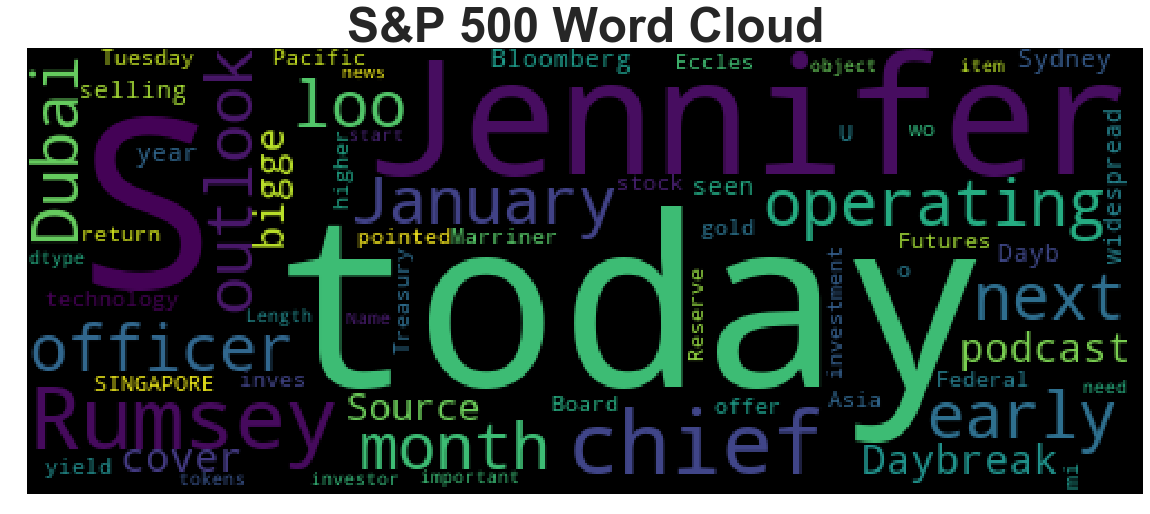

In [45]:
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

def wordcloud(tokens, title="", filename=""):
    df_cloud = WordCloud(width=500).generate(str(tokens))
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    # Export plot to png for use in Tableau Dashboard
    plt.savefig(filename, bbox_inches='tight')
    plt.show()

# Generate the S&P 500 word cloud
wordcloud(sp_news_sent['tokens'], title="S&P 500 Word Cloud", filename="sp_wordcloud.png")

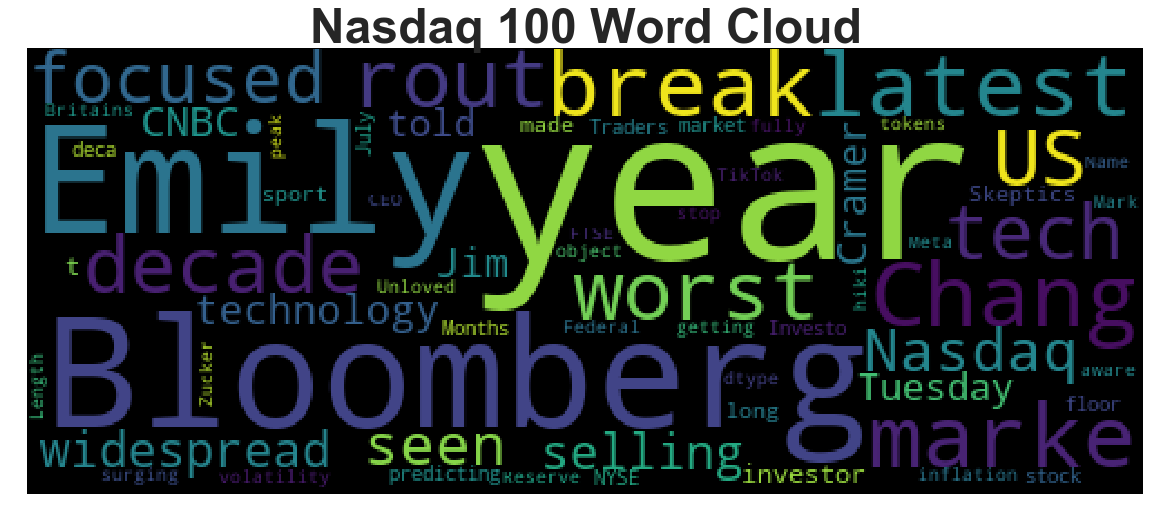

In [46]:
# Generate the Nasdaq 100 word cloud
wordcloud(qqq_news_sent['tokens'], title="Nasdaq 100 Word Cloud", filename="qqq_wordcloud.png")

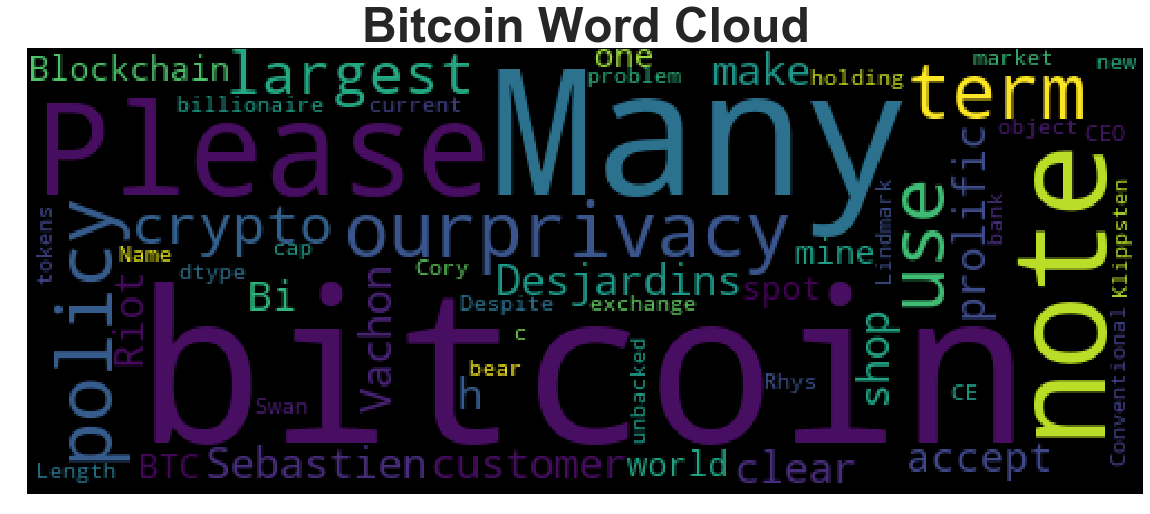

In [47]:
# Generate the Bitcoin word cloud
wordcloud(btc_news_sent['tokens'], title="Bitcoin Word Cloud", filename="btc_wordcloud.png")

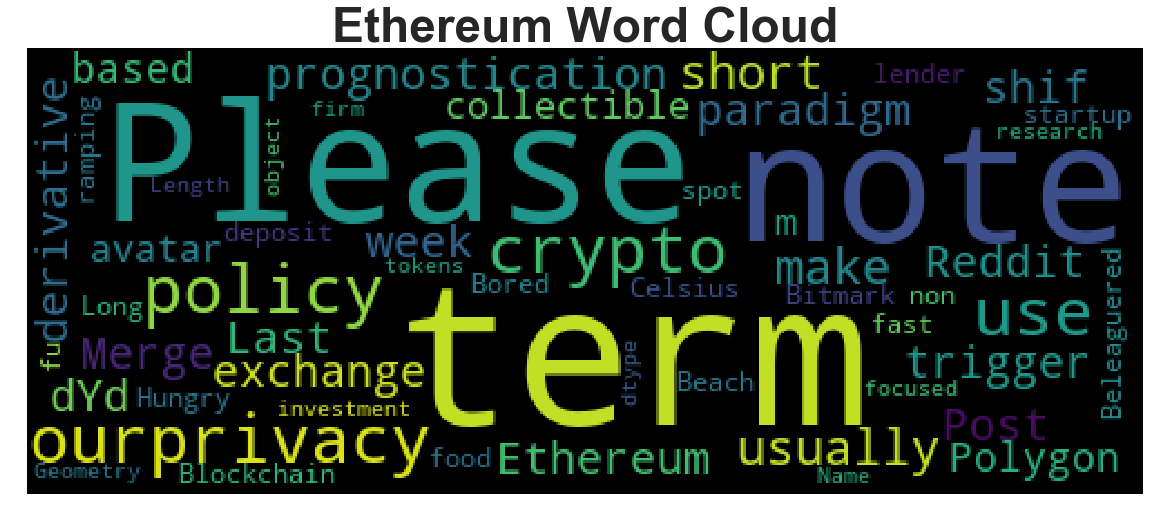

In [48]:
# Generate the Ethereum word cloud
wordcloud(eth_news_sent['tokens'], title="Ethereum Word Cloud", filename="eth_wordcloud.png")